In [1]:
import numpy as np
import pandas as pd
import re
import os
from os import listdir
from os.path import isfile, join
import string
from sklearn.datasets import fetch_20newsgroups
from nltk.corpus import stopwords # Importing list of stop words from nltk
import nltk
nltk.download('stopwords')
from string import punctuation # Importing list of punctuations from string
import operator
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.models import Sequential
from keras_preprocessing.sequence import pad_sequences
from keras.layers import Dense, LSTM
from keras.layers import Embedding
from sklearn.naive_bayes import MultinomialNB

TF_ENABLE_ONEDNN_OPTS=0
TF_DISABLE_MKL=1

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
DATA_DIR=r'C:\Users\aksha\Downloads\mini_newsgroups\mini_newsgroups'

In [3]:
folders=sorted(os.listdir(os.path.join(DATA_DIR))) # os.listdir gives a list of all files in this path
folders

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [4]:
data={}
for folder in folders:
    data[folder]=[]
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            data[folder].append(opened_file.read())
print(len(data[folders[1]]))

100


In [5]:
len(data)

20

In [6]:
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from string import punctuation
punctuations=list(punctuation)
stopWords=stopwords.words('english')
stopWords+=punctuations

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aksha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
stopWords+=['subject:','from:', 'date:', 'newsgroups:', 'message-id:', 'lines:', 'path:', 'organization:', 
            'would', 'writes:', 'references:', 'article', 'sender:', 'nntp-posting-host:', 'people', 
            'university', 'think', 'xref:', 'cantaloupe.srv.cs.cmu.edu', 'could', 'distribution:', 'first', 
            'anyone','world', 'really', 'since', 'right', 'believe', 'still', 
            "max>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'ax>'"]

In [8]:
vocab={} #dictionary of words and their frequency
for i in range(len(data)):
    for doc in data[folders[i]]: 
        for word in doc.split(): 
            if word.lower() not in stopWords and len(word.lower()) >= 5:
                if word.lower() not in vocab:
                    vocab[word.lower()]=1
                else:
                    vocab[word.lower()]+=1
len(vocab)

80766

In [9]:
import operator
sorted_vocab=sorted(vocab.items(),key=operator.itemgetter(1),reverse=True)

In [10]:
feature_list=[]
for key in sorted_vocab:
    feature_list.append(key[0])
feature_list=feature_list[0:2000]

In [11]:
Y=[] # list of newsgroups 
for i in range(len(data)):
    for doc in data[folders[i]]:
        Y.append(folders[i])
Y=np.array(Y)

In [12]:
df = pd.DataFrame(columns = feature_list)

for folder in folders:
    for file in os.listdir(os.path.join(DATA_DIR,folder)):
        df.loc[len(df)] = np.zeros(len(feature_list))
        with open(os.path.join(DATA_DIR,folder,file),encoding='latin-1') as opened_file:
            for word in opened_file.read().split():
                if word.lower() in feature_list:
                    df[word.lower()][len(df)-1] += 1 

In [13]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df,Y,random_state=0,test_size=0.20)

# Bert Classification

In [54]:
from sklearn.datasets import fetch_20newsgroups
train_set = fetch_20newsgroups(subset='train')
test_set = fetch_20newsgroups(subset='test')
print(len(train_set.data))
print(len(test_set.data))

11314
7532


In [55]:
train_set.data = train_set.data[:1500]
train_set.target = train_set.target[:1500]

In [56]:
test_set.data = test_set.data[:500]
test_set.target = test_set.target[:500]

In [57]:
X = train_set.data
print(len(X))
X.extend(test_set.data)
print(len(X))

y = list(train_set.target)
print(len(y))
y.extend(test_set.target)
print(len(y))

1500
2000
1500
2000


In [58]:
df_x = pd.DataFrame(X)

In [59]:
df_x

,0
0,From: lerxst@wam.umd.edu (where's my thing)\nS...
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...
...,...
1995,From: beng@dorsai.dorsai.org (Ben Ng)\nSubject...
1996,From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...
1997,From: ss@apmaths.uwo.ca (SULTAN SIAL)\nSubject...
1998,From: JEK@cu.nih.gov\nSubject: Jacob and Esau\...


In [60]:
df_y = pd.DataFrame(y)

In [61]:
df_x = df_x.set_axis(['Text'], axis=1, inplace=False)
df_y = df_y.set_axis(['Category'], axis=1, inplace=False)

In [62]:
df1 = pd.DataFrame(
        {
            "Text": df_x["Text"],
            "Category": df_y["Category"],
        },
#         index=[11313],
    )

In [63]:
df1

,Text,Category
0,From: lerxst@wam.umd.edu (where's my thing)\nS...,7
1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4
2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4
3,From: jgreen@amber (Joe Green)\nSubject: Re: W...,1
4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14
...,...,...
1995,From: beng@dorsai.dorsai.org (Ben Ng)\nSubject...,3
1996,From: carl@SOL1.GPS.CALTECH.EDU (Carl J Lydick...,13
1997,From: ss@apmaths.uwo.ca (SULTAN SIAL)\nSubject...,19
1998,From: JEK@cu.nih.gov\nSubject: Jacob and Esau\...,15


In [64]:
df1['Text'] = df1['Text'].apply(clean)
df1.head()

,Text,Category
0,thing subject car nntp posting host rac wam um...,7
1,guy kuo subject si clock poll final call summa...,4
2,thomas e willis subject pb questions organizat...,4
3,joe green subject weitek p organization harris...,1
4,jonathan mcdowell subject shuttle launch quest...,14


In [65]:
import tensorflow as tf
from sklearn.model_selection import train_test_split

y = tf.keras.utils.to_categorical(df1["Category"].values, num_classes=20)
# y = df1['Category']

x_train, x_test, y_train, y_test = train_test_split(df1['Text'], y, test_size=0.25)

In [66]:
!pip install tensorflow
!pip install tensorflow_text

DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 22.2.2 -> 23.2.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [67]:
import tensorflow_hub as hub
import tensorflow_text as text

preprocessor = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-preprocess/2")
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder-cmlm/multilingual-base/1")


def get_embeddings(sentences):
  '''return BERT-like embeddings of input text
  Args:
    - sentences: list of strings
  Output:
    - BERT-like embeddings: tf.Tensor of shape=(len(sentences), 768)
  '''
  preprocessed_text = preprocessor(sentences)
  return encoder(preprocessed_text)['pooled_output']


In [68]:
i = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
x = preprocessor(i)
x = encoder(x)
x = tf.keras.layers.Dropout(0.2, name="dropout")(x['pooled_output'])
x = tf.keras.layers.Dense(20, activation='softmax', name="output")(x)

model = tf.keras.Model(i, x)

In [69]:
from keras import backend as K

def balanced_recall(y_true, y_pred):
    """This function calculates the balanced recall metric
    recall = TP / (TP + FN)
    """
    recall_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true_class, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        recall_by_class = recall_by_class + recall
    return recall_by_class / y_pred.shape[1]

def balanced_precision(y_true, y_pred):
    """This function calculates the balanced precision metric
    precision = TP / (TP + FP)
    """
    precision_by_class = 0
    # iterate over each predicted class to get class-specific metric
    for i in range(y_pred.shape[1]):
        y_pred_class = y_pred[:, i]
        y_true_class = y_true[:, i]
        true_positives = K.sum(K.round(K.clip(y_true_class * y_pred_class, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred_class, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        precision_by_class = precision_by_class + precision
    # return average balanced metric for each class
    return precision_by_class / y_pred.shape[1]

def balanced_f1_score(y_true, y_pred):
    """This function calculates the F1 score metric"""
    precision = balanced_precision(y_true, y_pred)
    recall = balanced_recall(y_true, y_pred)
    return 2 * ((precision * recall) / (precision + recall + K.epsilon()))

In [70]:
n_epochs = 20

METRICS = [
      tf.keras.metrics.CategoricalAccuracy(name="accuracy"),
      balanced_recall,
      balanced_precision,
      balanced_f1_score
]

earlystop_callback = tf.keras.callbacks.EarlyStopping(monitor = "val_loss", 
                                                      patience = 3,
                                                      restore_best_weights = True)

model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = METRICS)

model_fit = model.fit(x_train, 
                      y_train, 
                      epochs = n_epochs,
                      validation_data = (x_test, y_test),
                      callbacks = [earlystop_callback])

Epoch 1/20
47/47 [==============================] - 274s 6s/step - loss: 2.9215 - accuracy: 0.1173 - balanced_recall: 0.0000e+00 - balanced_precision: 0.0000e+00 - balanced_f1_score: 0.0000e+00 - val_loss: 2.6334 - val_accuracy: 0.2960 - val_balanced_recall: 0.0000e+00 - val_balanced_precision: 0.0000e+00 - val_balanced_f1_score: 0.0000e+00
Epoch 2/20
47/47 [==============================] - 253s 5s/step - loss: 2.4762 - accuracy: 0.3307 - balanced_recall: 0.0000e+00 - balanced_precision: 0.0000e+00 - balanced_f1_score: 0.0000e+00 - val_loss: 2.3054 - val_accuracy: 0.4800 - val_balanced_recall: 0.0000e+00 - val_balanced_precision: 0.0000e+00 - val_balanced_f1_score: 0.0000e+00
Epoch 3/20
47/47 [==============================] - 248s 5s/step - loss: 2.1444 - accuracy: 0.4920 - balanced_recall: 0.0027 - balanced_precision: 0.0043 - balanced_f1_score: 0.0032 - val_loss: 2.0370 - val_accuracy: 0.5900 - val_balanced_recall: 0.0018 - val_balanced_precision: 0.0062 - val_balanced_f1_score: 0.

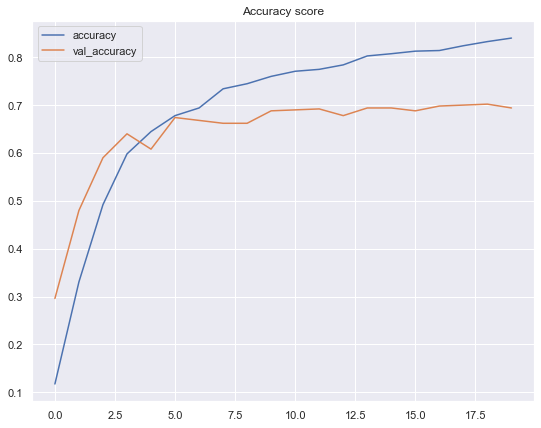

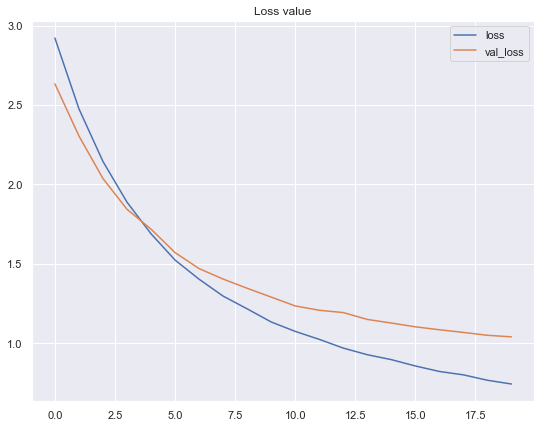

In [72]:
plt.figure(figsize=(9,7))
plt.title('Accuracy score')
plt.plot(model_fit.history['accuracy'])
plt.plot(model_fit.history['val_accuracy'])
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
plt.figure(figsize=(9,7))
plt.title('Loss value')
plt.plot(model_fit.history['loss'])
plt.plot(model_fit.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()